In [7]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [195]:
df = pd.read_csv("bike_sharing_dataset.csv")
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [231]:
#dummy data
data = pd.get_dummies(df, columns = ['season'])
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,0,0,0,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,0,0,0,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,0,0,0,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,0,0,0,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,0,0,0,1
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,0,0,0,1
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,0,0,0,1
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,0,0,0,1


In [171]:
#train/test split
data['timestamp'] = pd.to_datetime(data['timestamp'],format='%Y-%m-%d')
training = data.loc[(data['timestamp'] >= '2015-01-04') & (data['timestamp'] <= '2016-09-30')]
test = data.loc[(data['timestamp'] >= '2016-10-01') & (data['timestamp'] <= '2017-01-03')]
training

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,0,0,0,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,0,0,0,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,0,0,0,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,0,0,0,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15108,2016-09-29 20:00:00,1333,16.0,16.0,57.0,22.0,1.0,0.0,0.0,0,0,1,0
15109,2016-09-29 21:00:00,1037,15.0,15.0,65.5,22.0,1.0,0.0,0.0,0,0,1,0
15110,2016-09-29 22:00:00,773,14.5,14.5,65.0,21.0,1.0,0.0,0.0,0,0,1,0
15111,2016-09-29 23:00:00,572,14.0,14.0,69.5,19.0,1.0,0.0,0.0,0,0,1,0


In [172]:
#X/Y Split
trainingData = training.dropna()
trainingData = trainingData.iloc[:,1:].to_numpy()
xTrain = trainingData[:,1:]
yTrain = trainingData[:,0]
testData = test.dropna()
testData = testData.iloc[:,1:].to_numpy()
xTest = testData[:,1:]
yTest = testData[:,0]
print(len(xTrain))
print(len(xTest))

15113
2255


In [139]:
#PCA
zscored = stats.zscore(xTrain)
pca = PCA().fit(zscored)
eigVals = pca.explained_variance_
loadings = pca.components_*-1
rotatedData = pca.fit_transform(zscored)*-1
print(eigVals)
n = 8
plt.bar(np.linspace(1,n,n),eigVals)
plt.xlabel("Principal Components")
plt.ylabel("Eigenvalues")
plt.show()

threshold = 1
kaiser = np.count_nonzero(eigVals > threshold)
print(kaiser)

for i in range(kaiser):
    plt.subplot(2, 2, i+1)
    plt.bar(np.linspace(1,n,n),loadings[i,:])
    plt.xlabel('Predictors')
    plt.ylabel('Loading')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [151]:
#Multiple Linear Regression
model1 = LinearRegression().fit(xTrain,yTrain)
beta0 = model1.intercept_
beta1 = model1.coef_

yHat1 = model1.predict(xTest)
corr1 = np.corrcoef(yHat1,yTest)[0,1]
mse = mean_squared_error(yTest,yHat1)
print(mse)
print(corr1)

-0.8543553388741119
0.5918967853123428


'\nmodel2 = LinearRegression().fit(xTrain[:,:2],yTrain)\nbeta0 = model1.intercept_\nbeta1 = model1.coef_\n\nyHat2 = model2.predict(xTest[:,:2])\ncorr2 = np.corrcoef(yHat2,yTest)[0,1]\nprint(corr2)\n'

In [232]:
#Multiple Linear Regression (Season Split)
model1 = LinearRegression().fit(xTrain,yTrain)
beta0 = model1.intercept_
beta1 = model1.coef_

yHat1 = model1.predict(xTest)
corr1 = np.corrcoef(yHat1,yTest)[0,1]
mse = mean_squared_error(yTest,yHat1)
print(mse)
print(corr1)

C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


0.014430490618868665
nan


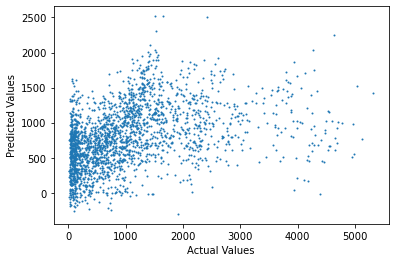

In [174]:
plt.plot(yTest,yHat1,'o',markersize=1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [109]:
#Random Forest 
model_random_forest = RandomForestRegressor(n_estimators=27).fit(xTrain,yTrain)
prediction = model_random_forest.predict(xTest)
mse = mean_squared_error(yTest,prediction)
r2 = r2_score(yTest,prediction)
print(mse)
print(r2)

958982.4157513852
0.025601219205412362


In [247]:
#Random Forest (Season Split) 
model_random_forest = RandomForestRegressor(n_estimators=75).fit(xTrain,yTrain)
prediction = model_random_forest.predict(xTest)
mse = mean_squared_error(yTest,prediction)
r2 = r2_score(yTest,prediction)
print(mse)
print(r2)

C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/3785962974.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest = RandomForestRegressor(n_estimators=75).fit(xTrain,yTrain)


0.015301141083581297
0.04437168645970735


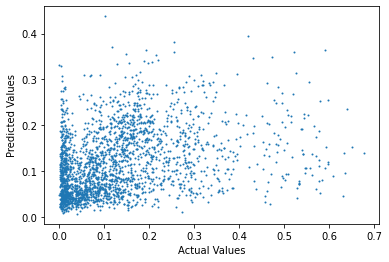

In [244]:
plt.plot(yTest,prediction,'o',markersize=1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [1]:
#XGBOOST
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


ModuleNotFoundError: No module named 'xgboost'

In [5]:
#Deep Learning
!pip install tensorflow
!pip install keras 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, roc_auc_score
from keras.optimizers import SGD

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=82583f7a0f7c28e07fe190fb15f777ba95efc328a7fa81f7b05f4b1b20a8c2ce
  Stored in directory: c:\users\ruiji\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [233]:
#Normalize the whole dataset.
Data = data.drop(columns=['timestamp'])
scaler_Data = MinMaxScaler().fit(Data.values)
Data_scaled = scaler_Data.transform(Data.values)

target = Data_scaled[:,0].reshape(-1,1)
Data_scaled = Data_scaled[:,1:]
Data_scaled
xTrain = Data_scaled[:15113, :]
yTrain = target[:15113,:]
xTest = Data_scaled[15113:,:]
yTest = target[15113:,:]

array([[0.12676056, 0.2       , 0.91194969, ..., 0.        , 0.        ,
        1.        ],
       [0.12676056, 0.2125    , 0.91194969, ..., 0.        , 0.        ,
        1.        ],
       [0.11267606, 0.2125    , 0.95597484, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.1971831 , 0.1875    , 0.72955975, ..., 0.        , 0.        ,
        1.        ],
       [0.1971831 , 0.1875    , 0.69811321, ..., 0.        , 0.        ,
        1.        ],
       [0.18309859, 0.175     , 0.69811321, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
#Normalize the whole dataset.
Data = data.drop(columns=['timestamp'])
scaler_Data = MinMaxScaler().fit(Data[:,0].values)
Data_scaled = scaler_Data.transform(Data[:,0].values)

target = Data_scaled.reshape(-1,1)

Data_scaled
xTrain = Data.iloc[:15113, 1:].to_numpy()
yTrain = target[:15113,:]
xTest = Data_scaled[15113:,:]
yTest = target[15113:,:]

In [290]:
Data.iloc[:15113, 1:].to_numpy()

array([[ 3. ,  2. , 93. , ...,  0. ,  0. ,  1. ],
       [ 3. ,  2.5, 93. , ...,  0. ,  0. ,  1. ],
       [ 2.5,  2.5, 96.5, ...,  0. ,  0. ,  1. ],
       ...,
       [14.5, 14.5, 65. , ...,  0. ,  1. ,  0. ],
       [14. , 14. , 69.5, ...,  0. ,  1. ,  0. ],
       [14. , 14. , 69.5, ...,  0. ,  1. ,  0. ]])

In [234]:
xTrain = Data_scaled[:15113, :]
yTrain = target[:15113,:]
xTest = Data_scaled[15113:,:]
yTest = target[15113:,:]

In [235]:
layer1_units = 5
layer2_units = 5

loss = 'mean_squared_error'

metrics = ['mean_squared_error']
epochs = 25
batch_size = 100
layer1_activation = 'relu'
layer2_activation = 'relu'
output_activation = 'sigmoid'
layer1_dropout_rate = 0.05
layer2_dropout_rate = 0.00
learning_rate=0.01
decay=1e-6
momentum=0.5

optimizer = SGD(lr=learning_rate, decay=decay, momentum=momentum)

C:\Users\ruiji\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [227]:
model3 = Sequential()
model3.add(Dense(layer1_units, input_dim=Data_scaled.shape[1], activation=layer1_activation))
model3.add(Dropout(layer1_dropout_rate))
model3.add(Dense(layer2_units, activation=layer1_activation))
model3.add(Dropout(layer2_dropout_rate))
model3.add(Dense(1, activation=output_activation))
model3.compile(loss=loss, optimizer=optimizer, metrics=metrics)



In [228]:
model_test = model3
model_test.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 5)                 60        
                                                                 
 dropout_12 (Dropout)        (None, 5)                 0         
                                                                 
 dense_19 (Dense)            (None, 5)                 30        
                                                                 
 dropout_13 (Dropout)        (None, 5)                 0         
                                                                 
 dense_20 (Dense)            (None, 1)                 6         
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [229]:
model3 = Sequential()
model3.add(Dense(layer1_units, input_dim=Data.shape[1], activation=layer1_activation))
model3.add(Dropout(layer1_dropout_rate))
model3.add(Dense(layer2_units, activation=layer1_activation))
model3.add(Dropout(layer2_dropout_rate))
model3.add(Dense(1, activation=output_activation))
model3.compile(loss=loss, optimizer=optimizer, metrics=metrics)
model_test = model3
model_test.summary()
history_test = model_test.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, verbose=1,shuffle=True, 
                              validation_data=(xTrain,yTrain))

Epoch 1/25
152/152 [==============================] - 3s 8ms/step - loss: 0.1223 - accuracy: 6.6168e-05 - val_loss: 0.0792 - val_accuracy: 6.6168e-05
Epoch 2/25
152/152 [==============================] - 1s 5ms/step - loss: 0.0624 - accuracy: 6.6168e-05 - val_loss: 0.0495 - val_accuracy: 6.6168e-05
Epoch 3/25
152/152 [==============================] - 1s 9ms/step - loss: 0.0425 - accuracy: 6.6168e-05 - val_loss: 0.0368 - val_accuracy: 6.6168e-05
Epoch 4/25
152/152 [==============================] - 1s 10ms/step - loss: 0.0333 - accuracy: 6.6168e-05 - val_loss: 0.0303 - val_accuracy: 6.6168e-05
Epoch 5/25
152/152 [==============================] - 2s 11ms/step - loss: 0.0283 - accuracy: 6.6168e-05 - val_loss: 0.0266 - val_accuracy: 6.6168e-05
Epoch 6/25
152/152 [==============================] - 1s 7ms/step - loss: 0.0254 - accuracy: 6.6168e-05 - val_loss: 0.0243 - val_accuracy: 6.6168e-05
Epoch 7/25
152/152 [==============================] - 1s 7ms/step - loss: 0.0236 - accuracy: 6.616

In [236]:
#Season Split
model3 = Sequential()
model3.add(Dense(layer1_units, input_dim=Data_scaled.shape[1], activation=layer1_activation))
model3.add(Dropout(layer1_dropout_rate))
model3.add(Dense(layer2_units, activation=layer1_activation))
model3.add(Dropout(layer2_dropout_rate))
model3.add(Dense(1, activation=output_activation))
model3.compile(loss=loss, optimizer=optimizer, metrics=metrics)
model_test = model3
model_test.summary()
history_test = model_test.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, verbose=1,shuffle=True, 
                              validation_data=(xTrain,yTrain))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 5)                 60        
                                                                 
 dropout_14 (Dropout)        (None, 5)                 0         
                                                                 
 dense_22 (Dense)            (None, 5)                 30        
                                                                 
 dropout_15 (Dropout)        (None, 5)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
152/152 [==============================] - 1s 4

In [238]:
history_test.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

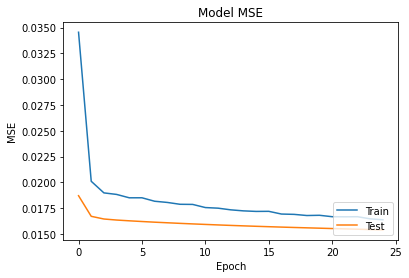

In [239]:
plt.plot(history_test.history['mean_squared_error'])
plt.plot(history_test.history['val_mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [194]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

depths = 9 #smallest
model4 = DecisionTreeRegressor(max_depth=depths)
model4.fit(xTrain,yTrain)

prediction = model4.predict(xTest)
mse = mean_squared_error(yTest,prediction)
r2 = r2_score(yTest,prediction)
print(mse)
print(r2)

932608.4401563283
0.052399176334161246


In [261]:
#Multiple Linear Regression (Season Split)
def linear_regression(x_train, y_train, x_test, y_test):
    model1 = LinearRegression().fit(x_train,y_train)
    beta0 = model1.intercept_
    beta1 = model1.coef_
    yHat1 = model1.predict(x_test)
    corr1 = np.corrcoef(yHat1,y_test)[0,1]
    mse = mean_squared_error(y_test,yHat1)
    print(corr1)
    print(f"MSE: {mse}")
    plt.plot(yTest,prediction,'o',markersize=1)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()


C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


nan
MSE: 0.014430490618868665


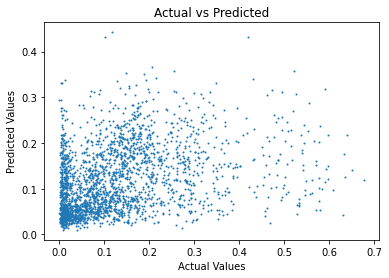

In [262]:
linear_regression(xTrain, yTrain, xTest, yTest)

In [263]:
from sklearn.linear_model import Lasso

In [270]:
#Lasso
def lasso(a, x_train, y_train, x_test, y_test):
    model2 = Lasso(alpha=a).fit(x_train,y_train)
    prediction = model2.predict(x_test)
    mse = mean_squared_error(y_test,prediction)

    print(f"MSE: {mse}")
    plt.plot(y_test,prediction,'o',markersize=1)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()


MSE: 0.014270058043894548


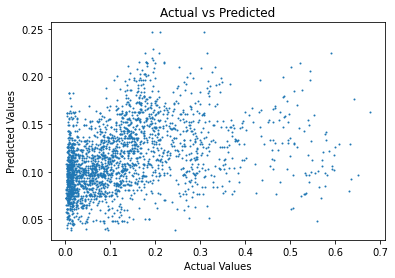

In [279]:
lasso(0.004, xTrain, yTrain, xTest, yTest)#Normalized data, Season Split

In [249]:
from sklearn.tree import DecisionTreeRegressor

In [252]:
#Decision Tree
def decision_tree(depths, x_train, y_train, x_test, y_test):
    model4 = DecisionTreeRegressor(max_depth=depths)
    model4.fit(x_train,y_train)

    prediction = model4.predict(x_test)
    mse = mean_squared_error(y_test,prediction)
    r2 = r2_score(y_test,prediction)
    print(f"MSE: {mse}")
    plt.plot(yTest,prediction,'o',markersize=1)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()


MSE: 0.01461102739696178


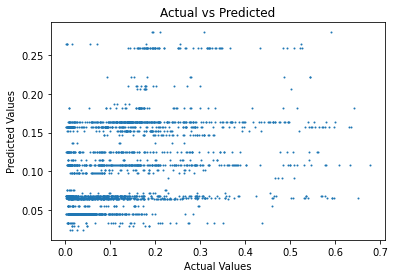

In [253]:
decision_tree(6, xTrain, yTrain, xTest, yTest) #Normalized data, Season Split

In [257]:
from sklearn.ensemble import RandomForestRegressor

In [255]:
#Random Forest
def random_forest(depths, x_train, y_train, x_test, y_test):
    model_random_forest = RandomForestRegressor(n_estimators=depths).fit(x_train,y_train)
    prediction = model_random_forest.predict(x_test)
    mse = mean_squared_error(y_test,prediction)
    print(f"MSE: {mse}")
    plt.plot(yTest,prediction,'o',markersize=1)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()


C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2040074505.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest = RandomForestRegressor(n_estimators=depths).fit(x_train,y_train)


MSE: 0.015473459259909634


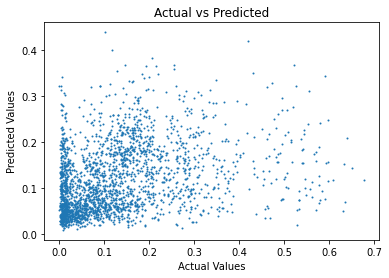

In [256]:
random_forest(75, xTrain, yTrain, xTest, yTest) #Normalized data, Season Split

In [283]:
layer1_units = 5
layer2_units = 5

loss = 'mean_squared_error'

metrics = ['mean_squared_error']
epochs = 25
batch_size = 100
layer1_activation = 'relu'
layer2_activation = 'relu'
output_activation = 'sigmoid'
layer1_dropout_rate = 0.05
layer2_dropout_rate = 0.00
learning_rate=0.01
decay=1e-6
momentum=0.5

optimizer = SGD(lr=learning_rate, decay=decay, momentum=momentum)

C:\Users\ruiji\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [284]:
model3 = Sequential()
model3.add(Dense(layer1_units, input_dim=Data_scaled.shape[1], activation=layer1_activation))
model3.add(Dropout(layer1_dropout_rate))
model3.add(Dense(layer2_units, activation=layer1_activation))
model3.add(Dropout(layer2_dropout_rate))
model3.add(Dense(1, activation=output_activation))
model3.compile(loss=loss, optimizer=optimizer, metrics=metrics)
model_test = model3
model_test.summary()
history_test = model_test.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, verbose=1,shuffle=True, 
                              validation_data=(xTrain,yTrain))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 5)                 60        
                                                                 
 dropout_16 (Dropout)        (None, 5)                 0         
                                                                 
 dense_25 (Dense)            (None, 5)                 30        
                                                                 
 dropout_17 (Dropout)        (None, 5)                 0         
                                                                 
 dense_26 (Dense)            (None, 1)                 6         
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
152/152 [==============================] - 1s 4

In [285]:
history_test.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

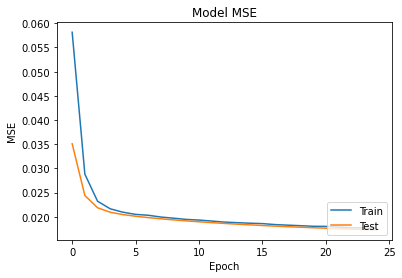

In [286]:
plt.plot(history_test.history['mean_squared_error'])
plt.plot(history_test.history['val_mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()